<a href="https://colab.research.google.com/github/shuvad23/Netflix-Data-Analysis-Project/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Analysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:

df=pd.read_csv('/content/netflix_movie_file.csv',lineterminator='\n')
df.head()
# try:
#     # Try reading with a different delimiter (e.g., tab or semicolon)
#     # df = pd.read_csv('/content/netflix_movie_file.csv', sep='\t', error_bad_lines=False)  # Try tab delimiter
#     df = pd.read_csv('/content/netflix_movie_file.csv', sep=';') # Try semicolon delimiter

#     # If the above doesn't work, try specifying the encoding
#     # df = pd.read_csv('/content/netflix_movie_file.csv', encoding='latin-1', error_bad_lines=False)  # Or 'utf-8', 'iso-8859-1', etc.
# except pd.errors.ParserError:
#     # If all else fails, display some lines of the file for manual inspection
#     with open('/content/netflix_movie_file.csv', 'r', encoding='utf-8') as file: # try encoding='latin-1' if 'utf-8' fails
#         for i in range(10):  # Print the first 10 lines
#             print(file.readline())
#     print("The CSV file may be corrupted or have unexpected formatting. Please inspect it manually.")
# else:
#     df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
# check any null value in the dataset
df.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [ ]:
# Overall information for this dataset
df.info()
# describe all the numerical values
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
# is any duplicate data in the dataset
df.duplicated().sum()

np.int64(0)

## Exploration Summary:

1. we have a dataframe consisting of 9827 rows and 0 Columns.
2. Our dataset looks a bit tidy with no NaN's nor duplicated values.
3. Release_date column needs to be casted into date_time and to extract only the year value.
4. Overview, original_language and poster_url wouldn't be so useful during analysis so we'll drop them.
5. there is noticable outliers in popularity column.
6. vote_average better be categorised for proper analysis.
7. genre column has comma saperated values and white spaces that needs to be handled and casted into category.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


 ## Release_date column needs to be casted into date_time and to extract only the year value.

In [ ]:

#1. Release_date column needs to be casted into date_time and to extract only the year value.

#Way 01 ( create a 'release_year' column ,add the year only then drop the 'release_date' column )
# df.Release_Date=pd.to_datetime(df.Release_Date)
# df['Release_Year']=df.Release_Date.dt.year
# df.drop('Release_Date',axis=1,inplace=True)
# df.head()

#way 02(only Year's are show now)
df.Release_Date=pd.to_datetime(df.Release_Date)
print(df.Release_Date.dtype)
df.Release_Date=df.Release_Date.dt.year
df.head()


datetime64[ns]


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## Dropping The Columns

In [ ]:
df.drop(columns=['Overview','Original_Language','Poster_Url'],axis=1,inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [ ]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

## **Categorizing Vote_Average column**

  We would cut the Vote_Average values and make 4 categories **popular, average, below_avg, not_popular** to describe it more using catigorize_col() function provided above.

In [ ]:
# way 01
# def categorize_col(column):
#   if column <= 5:
#     return 'not_popular'
#   elif column > 5 and column <7:
#     return 'below_avg'
#   elif column >= 7 and column <=8:
#     return 'average'
#   else:
#     return 'popular'
# df['Vote_Average']=df.Vote_Average.apply(categorize_col)
# df.head()



# way02
# def categorize_col(df,column,labels):
#   df[column]=pd.cut(df[column],bins=4,labels=labels)
#   return df
# df=categorize_col(df,'Vote_Average',['not_popular','below_avg','average','popular'])
# df.head()

#way03
def categorize_col(df,column,labels):
  edges=[
      df[column].min(),
      df[column].quantile(0.25),
      df[column].quantile(0.5),
      df[column].quantile(0.75),
      df[column].max()
  ]

  df[column]=pd.cut(df[column],bins=edges,labels=labels,duplicates='drop')
  return df

labels=['not_popular','below_avg','average','popular']
df=categorize_col(df,'Vote_Average',labels)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [ ]:
# unique values
df.Vote_Average.unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [ ]:
#values counts
df.Vote_Average.value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [ ]:
# remove duplicate values in the dataset
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [ ]:
df.Vote_Average.nunique()

4

In [ ]:
df.Vote_Average.value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


### We would split genres into a list then explode our dataframe to have only one genre per row for each movie

In [ ]:
df.Genre=df.Genre.str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
# casting column into category
df.Genre=df.Genre.astype('category')
df.Genre.dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [ ]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


# Data Visualization

In [ ]:
sns.set_style('whitegrid')

# **Question 01:** What is the most frequent genre of movies released on Netflix ?

In [ ]:
df.Genre.describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


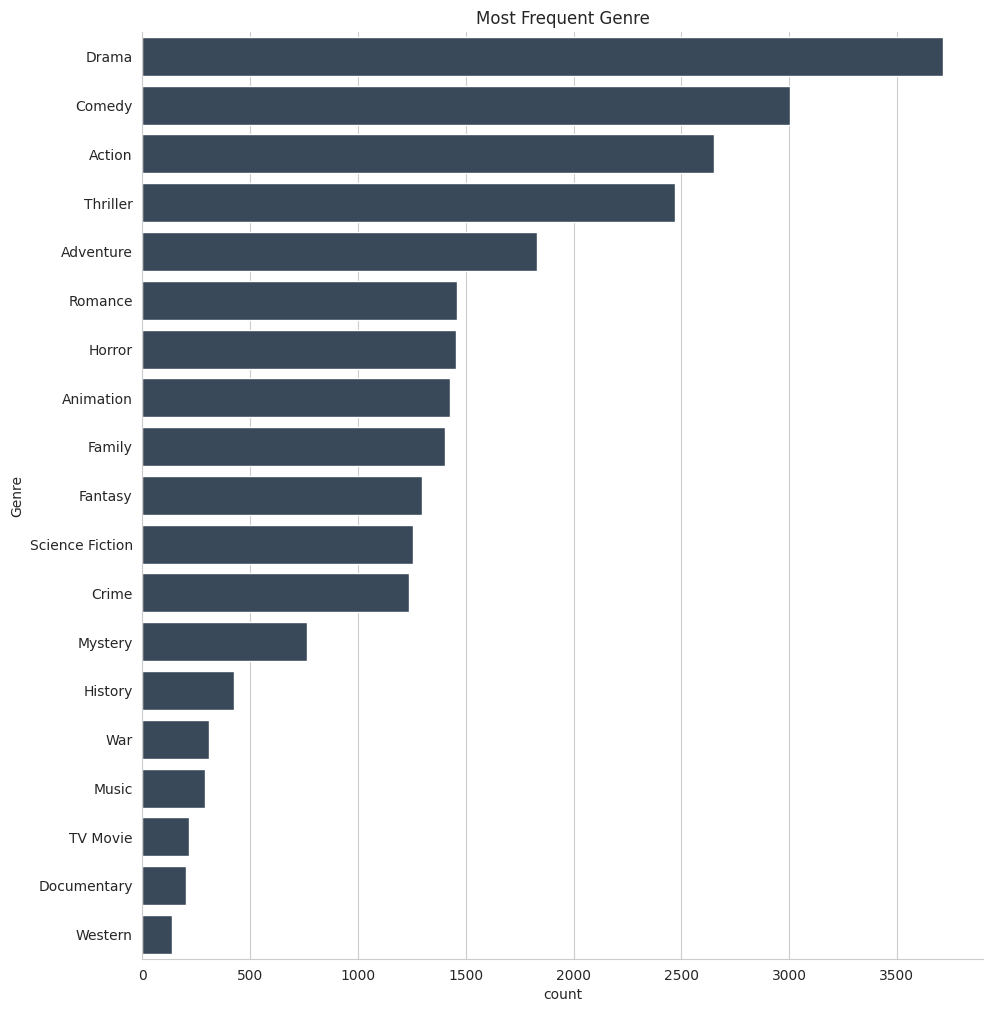

In [ ]:
sns.catplot(y='Genre',data=df,kind='count',height=10,aspect=1,
            order=df.Genre.value_counts().index,
            color='#34495e')
plt.title('Most Frequent Genre')
plt.show()


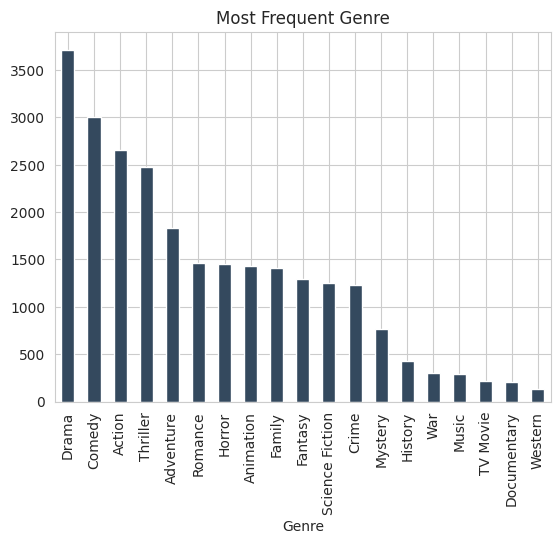

In [ ]:
# show in another plot
df.Genre.value_counts().plot(kind='bar',color='#34495e')
plt.title('Most Frequent Genre')
plt.show()

## **Question 02:** Which has highest votes in vote avg column ?

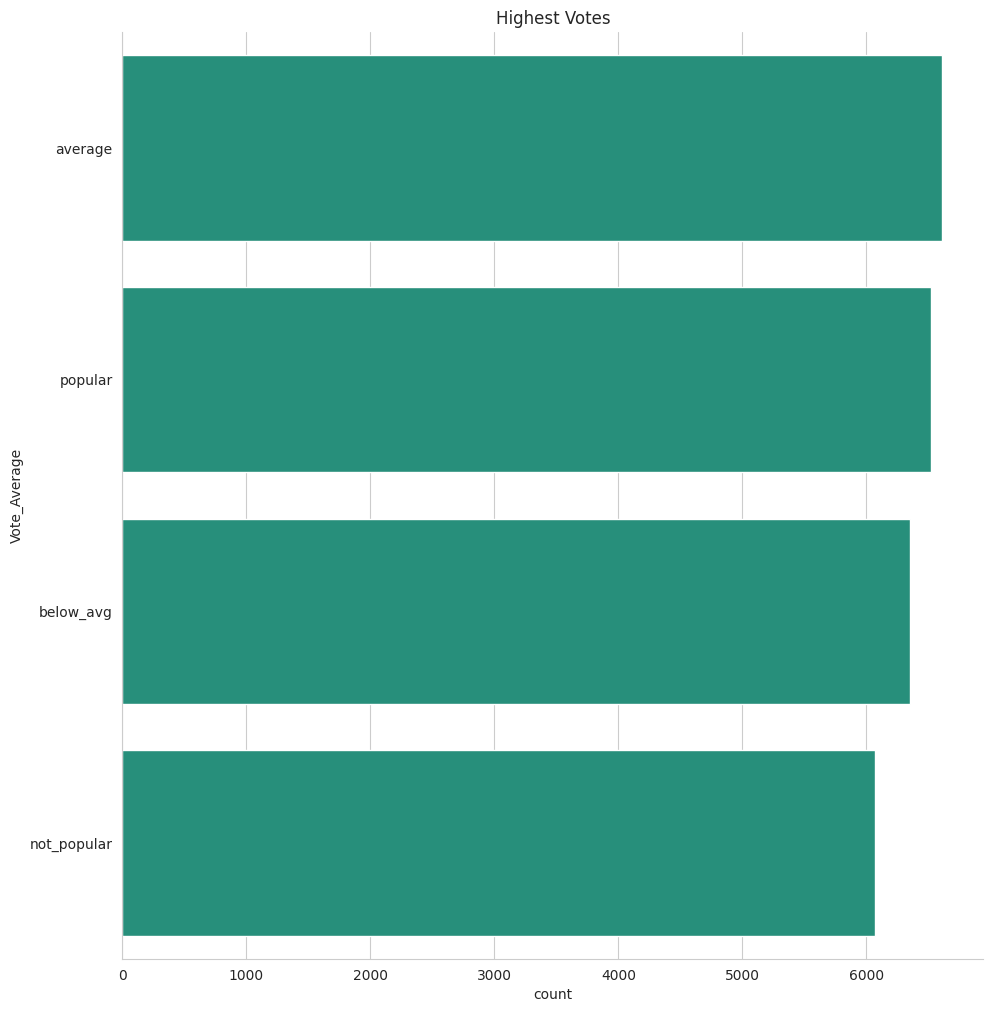

In [ ]:
sns.catplot(y='Vote_Average',data=df,kind='count',height=10,aspect=1,
            order=df.Vote_Average.value_counts().index,
            color='#16a085')
plt.title('Highest Votes')
plt.show()

## **Question 03:** What movie got the highest popularity ? what's its genre ?


In [ ]:
# Find the row(s) with max Popularity
max_popularity_off=df[df['Popularity'] == df['Popularity'].max()]
max_popularity_off

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


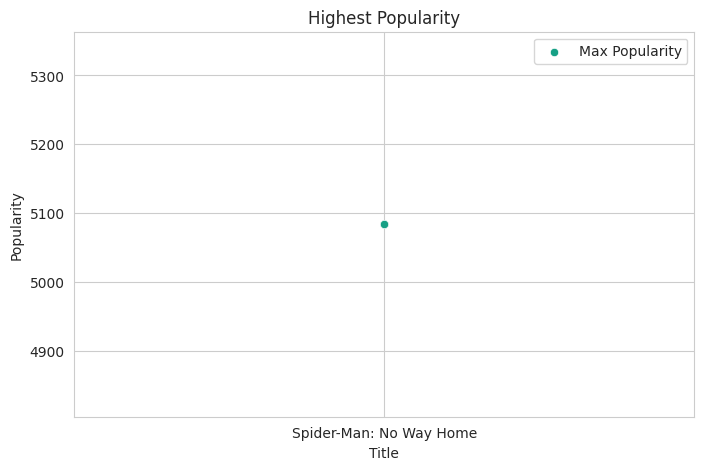

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=max_popularity_off,x='Title',y='Popularity',color='#16a085',label='Max Popularity')
plt.title('Highest Popularity')
plt.show()

## **Question 04:** What movie got the lowest popularity ? what's its genre ?

In [ ]:
# Find the row(s) with min Popularity
min_popularity_off=df[df['Popularity']==df['Popularity'].min()]
min_popularity_off

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


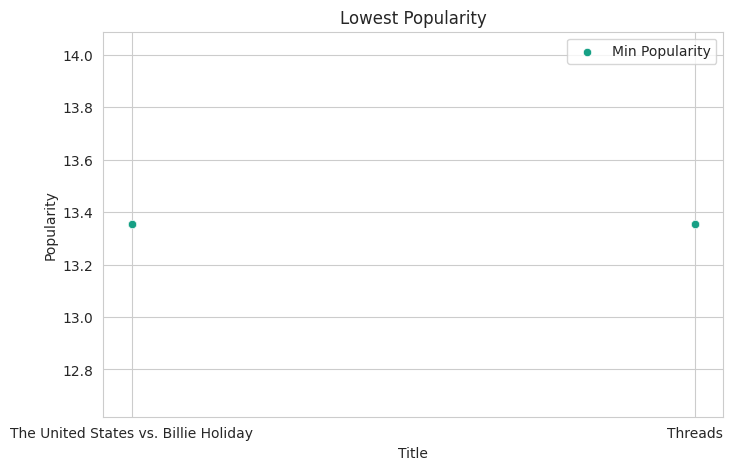

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=min_popularity_off,x='Title',y='Popularity',color='#16a085',label='Min Popularity')
plt.title('Lowest Popularity')
plt.show()

## **Question 05:** Which year has the most filmmed movies ?

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
most_filmmed_movies=df[df['Release_Date']==df['Release_Date'].max()]
most_filmmed_movies
# most_filmmed_movies.Release_Date.head(1)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
5,2022,The Batman,3827.658,1151,popular,Thriller
6,2022,No Exit,2618.087,122,below_avg,Thriller
15,2022,The Commando,1750.484,33,average,Action
...,...,...,...,...,...,...
24892,2022,Chickenhare and the Hamster of Darkness,13.590,5,below_avg,Family
24893,2022,Chickenhare and the Hamster of Darkness,13.590,5,below_avg,Fantasy
25194,2022,Ted K,13.479,18,below_avg,Drama
25195,2022,Ted K,13.479,18,below_avg,Crime


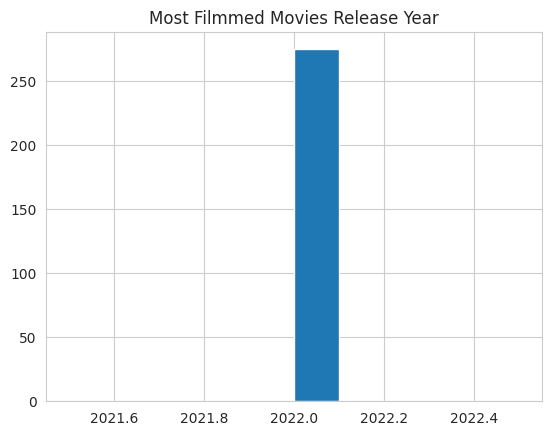

In [ ]:
most_filmmed_movies.Release_Date.hist()
plt.title('Most Filmmed Movies Release Year')
plt.show()

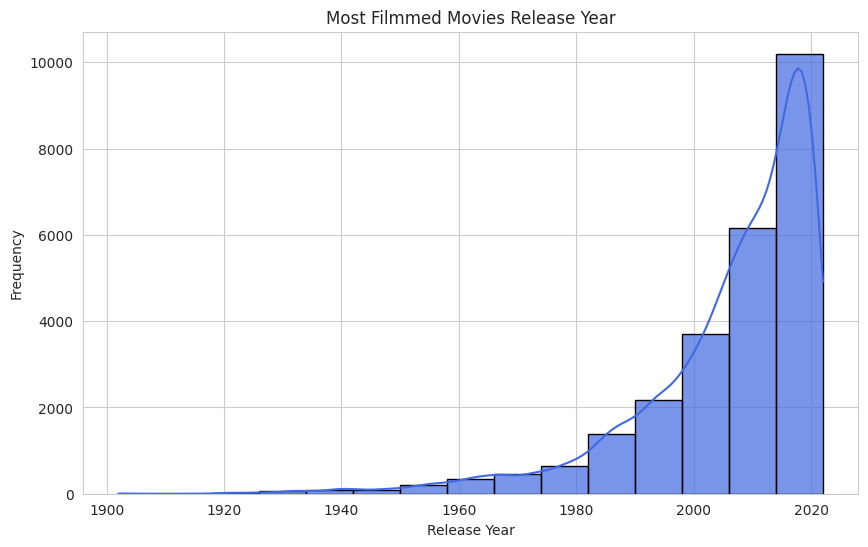

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Release_Date'], bins=15, kde=True, color='royalblue', edgecolor='black', alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Most Filmmed Movies Release Year')
plt.show()

In [2]:
df=pd.read_csv('/content/netflix_movie_file.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.Release_Date=pd.to_datetime(df.Release_Date)
df.Release_Date
print(df.Release_Date.dtype)
df.dtypes

datetime64[ns]


,0
Release_Date,datetime64[ns]
Title,object
Overview,object
Popularity,float64
Vote_Count,int64
Vote_Average,float64
Original_Language,object
Genre,object
Poster_Url,object


In [4]:
df.Genre=df.Genre.str.split(', ')

In [5]:
genre_count = {}

def count_genre(genre_list):
    # Handle None or float values
    if genre_list is None or isinstance(genre_list, float) or not genre_list:  # Check if it's None or float or empty list
        return {}  # Return empty dictionary if not iterable

    for genre in genre_list:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1
    return genre_count

count_genre=df['Genre'].apply(count_genre)

Genre_Count_df =pd.DataFrame.from_dict(genre_count,orient='index',columns=['Count'])
Genre_Count_df.reset_index(inplace=True)
Genre_Count_df.rename(columns={'index': 'Genre'},inplace=True)
Genre_Count_df


,Genre,Count
0,Action,2686
1,Adventure,1853
2,Science Fiction,1273
3,Crime,1242
4,Mystery,773
5,Thriller,2488
6,Animation,1439
7,Comedy,3031
8,Family,1414
9,Fantasy,1308


In [6]:
# Sorting the count
Genre_Count_df.sort_values(by='Count',ascending=False,inplace=True)
Genre_Count_df

,Genre,Count
12,Drama,3744
7,Comedy,3031
0,Action,2686
5,Thriller,2488
1,Adventure,1853
14,Romance,1476
11,Horror,1470
6,Animation,1439
8,Family,1414
9,Fantasy,1308


<ipython-input-7-fecdd108ff9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Genre_Count_df, x='Genre', y='Count', palette='viridis')


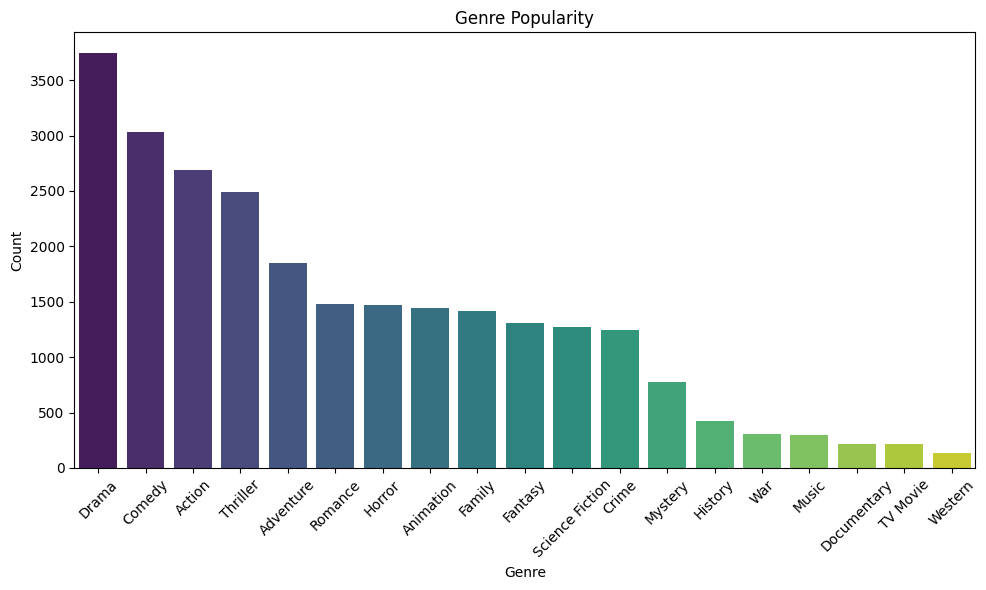

In [7]:

plt.figure(figsize=(10, 6))
sns.barplot(data=Genre_Count_df, x='Genre', y='Count', palette='viridis')
plt.title('Genre Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# using plotly
import plotly.express as px

fig = px.bar(Genre_Count_df, x='Genre', y='Count', title='Genre Popularity')
fig.show()

## **Question 06:** "Do movies released in certain months or seasons tend to have higher popularity or vote averages?

    a. Analyze if release timing (e.g., summer blockbusters, holiday season) correlates with success metrics.

    b. Group by month/season and compare mean popularity/vote averages.


In [ ]:
df.dtypes

,0
Release_Date,datetime64[ns]
Title,object
Overview,object
Popularity,float64
Vote_Count,int64
Vote_Average,float64
Original_Language,object
Genre,object
Poster_Url,object


In [11]:
# 1. Extract temporal features
df['Release_Month']=df.Release_Date.dt.month
df['Release_Season']=df.Release_Date.dt.month.apply(
    lambda x: 'Winter' if x in [12,1,2] else
              'Spring' if x in [3,4,5] else
              'Summer' if x in [6,7,8] else
              'Fall'
)
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Month,Release_Season
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"[Action, Adventure, Science Fiction]",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,12,Winter
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"[Crime, Mystery, Thriller]",https://image.tmdb.org/t/p/original/74xTEgt7R3...,3,Spring
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,[Thriller],https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2,Winter


In [13]:
# 2. Calculate monthly averages
monthly_stats=df.groupby('Release_Month').agg(
    {
        'Popularity':'mean',
        'Vote_Average': 'mean',
        'Title': 'count'
    }
).rename(columns={'Title': 'Count'})
monthly_stats.sort_values(by='Popularity',ascending=False)

,Popularity,Vote_Average,Count
Release_Month,,,
2,57.843150,6.412183,788
1,50.663928,6.345300,649
11,46.127109,6.552598,789
12,44.501427,6.687163,927
7,40.572273,6.415711,802
6,39.140551,6.393229,768
3,38.635806,6.070853,868
10,35.829075,6.492480,1024
5,34.839611,6.442256,665


In [ ]:
# 3. Calculate seasonal averages
seasonal_stats=df.groupby('Release_Season').agg(
    {
        'Popularity':'mean',
        'Vote_Average': 'mean',
        'Title': 'count'
    }
).rename(columns={'Title': 'Count'})
seasonal_stats.sort_values(by='Popularity',ascending=False)

,Popularity,Vote_Average,Count
Release_Season,,,
Winter,50.640488,6.501650,2364
Summer,37.981089,6.417515,2455
Fall,37.479023,6.535424,2806
Spring,35.495296,6.275204,2202


In [ ]:
# 4. Visualization
plt.figure(figsize=(20, 1))

<Figure size 2000x100 with 0 Axes>

<Figure size 2000x100 with 0 Axes>

(0.0, 63.627464720812185)

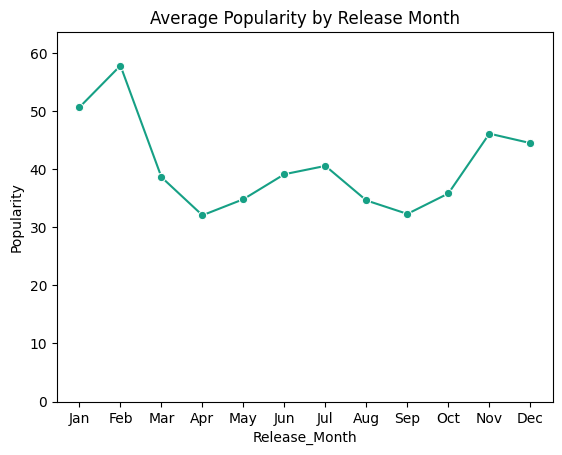

In [16]:
# Monthly Popularity

sns.lineplot(data=monthly_stats,x='Release_Month',y='Popularity',color='#16a085',marker='o')
plt.title('Average Popularity by Release Month')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Popularity')
plt.ylim(0,monthly_stats.Popularity.max()*1.1)

(0.0, 7.18896650035638)

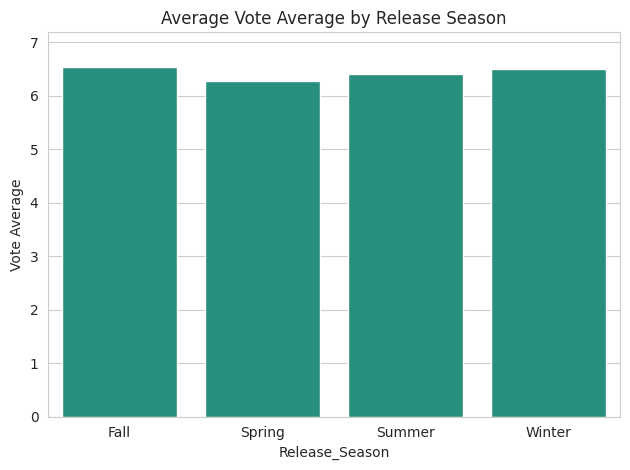

In [ ]:
# Seasonal Vote Average
sns.barplot(data=seasonal_stats,x='Release_Season',y='Vote_Average',color='#16a085')
plt.title('Average Vote Average by Release Season')
plt.ylabel('Vote Average')
plt.tight_layout()
plt.ylim(0,seasonal_stats.Vote_Average.max()*1.1)

In [22]:
# 5. Statistical Validation
# Compare winter vs non-winter popularity
winter_popularity = df[df.Release_Season == 'Winter']['Popularity']
non_winter_popularity=df[df.Release_Season != 'Winter']['Popularity']
t_stat,p_value=stats.ttest_ind(winter_popularity,non_winter_popularity,equal_var=False)

print(f'winter vs Non-winter Popularity T-statistic:{t_stat:.4f}, P_Value = {p_value:.4f}')
if p_value<0.05:
  print('Difference is statistically significant')
else:
  print('No significant difference found')

winter vs Non-winter Popularity T-statistic:3.6545, P_Value = 0.0003
Difference is statistically significant


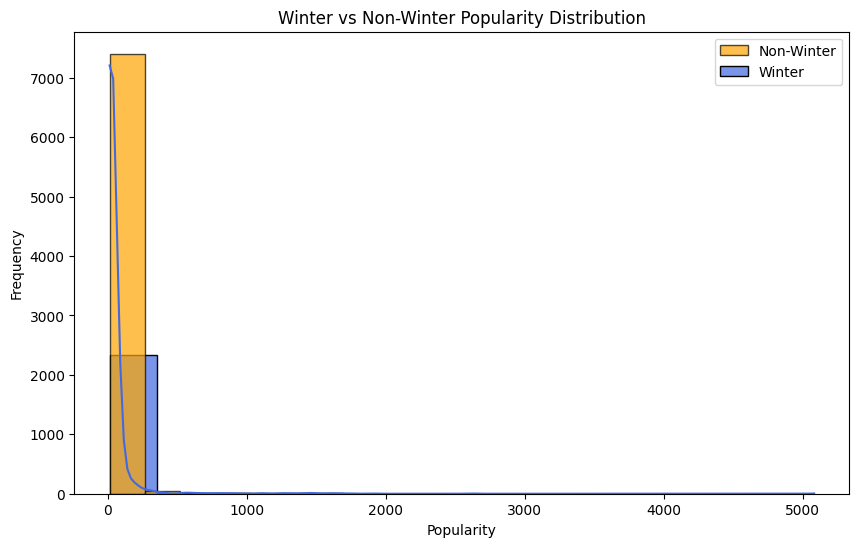

In [21]:
# Compare summer vs non-summer popularity
plt.figure(figsize=(10, 6))
sns.histplot(data=winter_popularity, bins=15, kde=True, color='royalblue', edgecolor='black', alpha=0.7, label='Winter')
plt.hist(non_winter_popularity, bins=15, alpha=0.7, color='orange', edgecolor='black', label='Non-Winter')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Winter vs Non-Winter Popularity Distribution')
plt.legend()
plt.show()

## **Question 07:** "Is there a relationship between the number of genres a movie belongs to and its popularity/rating?"

    a. Do multi-genre films (e.g., Action-Comedy-Sci-Fi) perform better than single-genre films?

    b. Calculate genre count per movie and correlate with popularity/vote averages.

In [27]:
# 1. Calculate number of genres per movie
df['Genre_per_movie']=df.Genre.apply(lambda x: len(x) if isinstance(x,list) else 0)
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Month,Release_Season,Genre_per_movie
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"[Action, Adventure, Science Fiction]",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,12,Winter,3
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"[Crime, Mystery, Thriller]",https://image.tmdb.org/t/p/original/74xTEgt7R3...,3,Spring,3
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,[Thriller],https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2,Winter,1


In [28]:
# 2. Analyze relationship between genre count and metrics
genre_count_stats=df.groupby('Genre_per_movie').agg(
    {
        'Popularity':['mean','median','count'],
        'Vote_Average':['mean','median']
    }
).round(2)
genre_count_stats

Popularity              Vote_Average       
                      mean median count         mean median
Genre_per_movie                                            
1                    37.29  20.04  1615         6.27    6.4
2                    33.24  19.70  3061         6.40    6.5
3                    44.98  22.29  3213         6.51    6.6
4                    48.53  23.27  1408         6.52    6.6
5                    40.65  24.14   416         6.48    6.6
6                    38.67  23.43    96         6.71    6.8
7                    49.30  20.27    15         6.95    7.0
8                    30.33  23.50     3         6.87    7.0

In [35]:
genre_count_stats.sort_values(by=('Popularity','count'),ascending=False)

Popularity              Vote_Average       
                      mean median count         mean median
Genre_per_movie                                            
3                    44.98  22.29  3213         6.51    6.6
2                    33.24  19.70  3061         6.40    6.5
1                    37.29  20.04  1615         6.27    6.4
4                    48.53  23.27  1408         6.52    6.6
5                    40.65  24.14   416         6.48    6.6
6                    38.67  23.43    96         6.71    6.8
7                    49.30  20.27    15         6.95    7.0
8                    30.33  23.50     3         6.87    7.0

In [29]:
# 3. Visualization
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<ipython-input-31-11dfbee3da18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Genre_per_movie',y='Popularity',palette='viridis',showfliers=False)


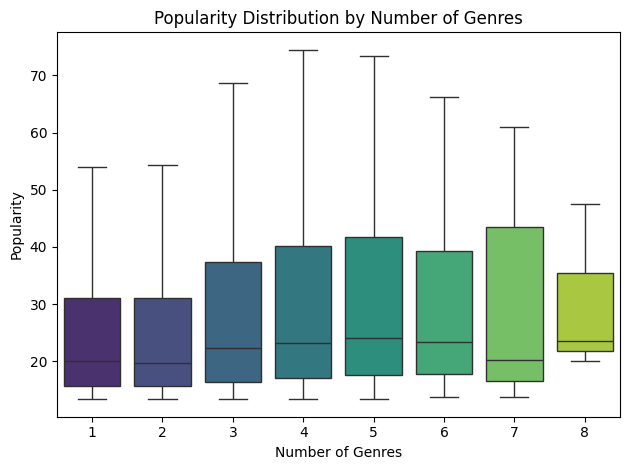

In [31]:
# Popularity by Genre Count
sns.boxplot(data=df,x='Genre_per_movie',y='Popularity',palette='viridis',showfliers=False)
plt.title('Popularity Distribution by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

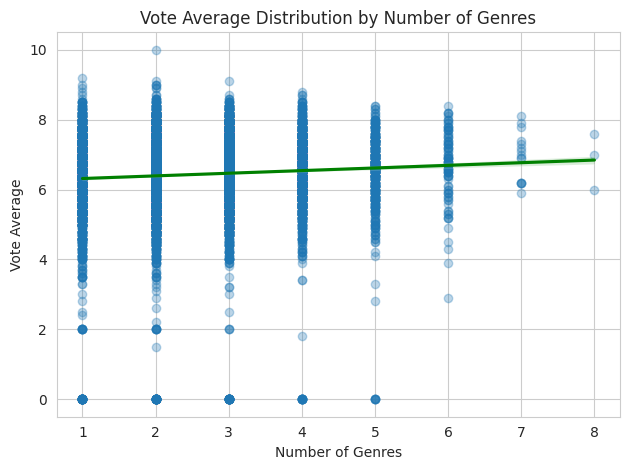

In [ ]:
# Vote Average by Genre Count
sns.regplot(data=df, x='Genre_per_movie', y='Vote_Average',
           scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Vote Average Distribution by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Vote Average')
plt.tight_layout()
plt.show()

In [36]:
# 4. Statistical Analysis
# Correlation tests
corr_popularity, p_value_popularity=stats.pearsonr(df.Genre_per_movie,df.Popularity)
corr_vote_avg, p_value_vote_avg=stats.pearsonr(df.Genre_per_movie,df.Vote_Average)

print(f'Popularity vs Genre Count Correlation: {corr_popularity:.4f}, p-value: {p_value_popularity:.4f}')
print(f'Vote Average vs Genre Count Correlation: {corr_vote_avg:.4f}, p-value: {p_value_vote_avg:.4f}')

Popularity vs Genre Count Correlation: 0.0360, p-value: 0.0004
Vote Average vs Genre Count Correlation: 0.0749, p-value: 0.0000


In [ ]:
# Compare single vs multi-genre films
single_genre=df[df.Genre_per_movie ==1]
multi_genre=df[df.Genre_per_movie >1]

t_test_popularity=stats.ttest_ind(single_genre['Popularity'],multi_genre['Popularity'],equal_var=False)
t_test_vote_avg=stats.ttest_ind(single_genre['Vote_Average'],multi_genre['Vote_Average'],equal_var=False)

print(f"\nSingle vs Multi-genre Popularity T-test: p-value = {t_test_popularity.pvalue:.4f}")
print(f"Single vs Multi-genre Vote Average T-test: p-value = {t_test_vote_avg.pvalue:.4f}")


Single vs Multi-genre Popularity T-test: p-value = 0.2138
Single vs Multi-genre Vote Average T-test: p-value = 0.0000


## **Question 08:** "How does vote count (a proxy for audience engagement) influence vote average? Are highly-rated movies more polarizing?"

    a. Check if movies with very high/low vote averages have fewer votes (niche appeal) or more votes (broad consensus).
    b. Scatter plot of vote count vs. vote average with trendlines.

In [38]:
# Assuming df contains 'Vote_Count' and 'Vote_Average' columns

# 1. Create engagement segments
df['Rating_Type']=pd.cut(
    df.Vote_Average,
    bins=[0,5.9,7.4,10],
    labels = ['Low-Rated','Mid_Rated','High-Rated']
)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Month,Release_Season,Genre_per_movie,Rating_Type
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"[Action, Adventure, Science Fiction]",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,12,Winter,3,High-Rated
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"[Crime, Mystery, Thriller]",https://image.tmdb.org/t/p/original/74xTEgt7R3...,3,Spring,3,High-Rated
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,[Thriller],https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2,Winter,1,Mid_Rated
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"[Animation, Comedy, Family, Fantasy]",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,11,Fall,4,High-Rated
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"[Action, Adventure, Thriller, War]",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,12,Winter,4,Mid_Rated


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.11/dist-packages/numpy/_core/function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


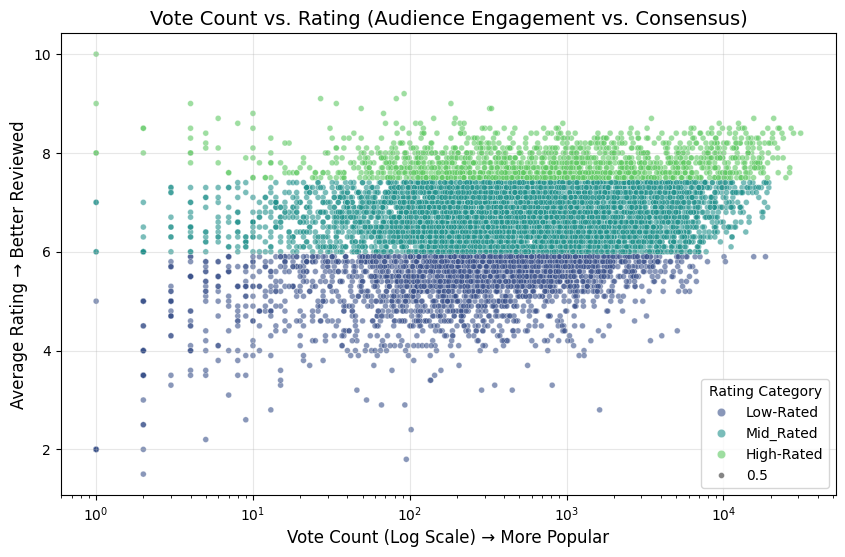

In [49]:
# 2. Scatter plot with trendlines
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Vote_Count',y='Vote_Average',hue='Rating_Type',palette='viridis',alpha=0.6,size=0.5)
# Add logarithmic trendline (since vote counts often follow power law)
x_log=np.log(df.Vote_Count)
y=df.Vote_Average
sns.regplot(x=x_log,y=y,scatter=False,color='black',line_kws={'label':'Overall Trend'})
plt.xscale('log')  # Better visualization for vote count distribution
plt.title('Vote Count vs. Rating (Audience Engagement vs. Consensus)', fontsize=14)
plt.xlabel('Vote Count (Log Scale) → More Popular', fontsize=12)
plt.ylabel('Average Rating → Better Reviewed', fontsize=12)
plt.legend(title='Rating Category')
plt.grid(True, alpha=0.3)
plt.show()

Interpretation:

  1. Since the correlation is only 0.2536, the relationship is weak, meaning that the number of votes does not strongly determine the average vote.

  2. However, because the p-value is so low, we can be confident that even though the correlation is weak, it is not due to random chance.

In [51]:
# 3. Statistical analysis
print("\nKey Insights:")
correlation,p_value=stats.pearsonr(df.Vote_Count,df.Vote_Average)
print(f'Correlation between Vote Count and Vote Average: {correlation:.4f}, p-value: {p_value:.4f}')


Key Insights:
Correlation between Vote Count and Vote Average: 0.2536, p-value: 0.0000


Interpretation of the T-Test Results:

**1. High vs. Low-Rated Movies Comparison:**

    a. High-rated movies have an average of 2,859.70 votes.
    b. Low-rated movies have an average of 602.17 votes.
    c. This suggests that highly-rated movies tend to receive significantly more votes.

**2. T-Statistic: 18.2366**

    a. The T-statistic measures the difference between the two groups (high-rated vs. low-rated movies) relative to the variability in the data.
    b. A high T-value (18.2366) suggests a very strong difference between the two groups.

**3. P-Value: 0.0000**

    a. The p-value is essentially 0 (p < 0.0001), meaning the result is statistically significant.
    b. This means there is almost no chance that the difference in vote counts between high-rated and low-rated movies is due to random chance.


**Conclusion:**

1. High-rated movies receive significantly more votes than low-rated ones.

2. This could mean that popular movies (which get more votes) tend to be rated higher, or that movies with high ratings attract more attention and therefore receive more votes.

3. The result is highly significant, confirming a strong difference in vote counts between the two groups.

In [52]:
# Compare vote counts across rating categories
high_rated_movies=df[df.Rating_Type == 'High-Rated']['Vote_Count']
low_rated_movies=df[df.Rating_Type == 'Low-Rated']['Vote_Count']
t_stat,p_value=stats.ttest_ind(high_rated_movies,low_rated_movies,equal_var=False)
print(f'\nHigh vs Low Rate Movies: ')
print(f'High-Rated avg votes: {high_rated_movies.mean():.2f} vs Low-Rated {low_rated_movies.mean():.2f}')
print(f'T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}')


High vs Low Rate Movies: 
High-Rated avg votes: 2859.70 vs Low-Rated 602.17
T-statistic: 18.2366, p-value: 0.0000


## **Question 09:** "Which genres have the highest ‘efficiency ratio’ of popularity-to-vote average?"

    a. Identify genres that consistently overperform (high popularity + high ratings) or underperform.

    b. Compare median popularity/vote averages by genre (e.g., Documentaries vs. Superhero films).

In [55]:
# Assuming df has 'Genre' (list of genres), 'Popularity', and 'Vote_Average'
# First explode genres to have one row per genre-movie combination
genre_exploded=df.explode('Genre')

# Calculate median metrics by genre
genre_stats=genre_exploded.groupby('Genre').agg(
    {
        'Popularity':'median',
        'Vote_Average':'median',
        'Title': 'count'
    }
).rename(columns={'Title': 'Movie_Count'})
genre_stats

,Popularity,Vote_Average,Movie_Count
Genre,,,
Action,24.5175,6.40,2686
Adventure,25.5140,6.60,1853
Animation,27.4840,6.90,1439
Comedy,20.5630,6.50,3031
Crime,19.9410,6.60,1242
Documentary,19.2930,7.10,215
Drama,19.1125,6.80,3744
Family,24.9400,6.70,1414
Fantasy,25.9965,6.60,1308


In [59]:
# Calculate efficiency ratio (popularity per rating point)
genre_stats['Efficiency'] = genre_stats['Popularity'] / genre_stats['Vote_Average']
genre_stats.sort_values(by='Efficiency',ascending=False)


,Popularity,Vote_Average,Movie_Count,Efficiency
Genre,,,,
Animation,27.4840,6.90,1439,3.983188
Fantasy,25.9965,6.60,1308,3.938864
Adventure,25.5140,6.60,1853,3.865758
Science Fiction,24.6980,6.40,1273,3.859062
Action,24.5175,6.40,2686,3.830859
Family,24.9400,6.70,1414,3.722388
Horror,21.8100,6.00,1470,3.635000
Thriller,21.2380,6.30,2488,3.371111
Mystery,20.9610,6.40,773,3.275156


In [60]:
# Create genre clusters
conditions=[
    (genre_stats.Popularity > genre_stats.Popularity.mean()) &
    (genre_stats.Vote_Average > genre_stats.Vote_Average.mean()),
    (genre_stats.Popularity > genre_stats.Popularity.mean()) &
    (genre_stats.Vote_Average <= genre_stats.Vote_Average.mean()),
    (genre_stats.Popularity <= genre_stats.Popularity.mean()) &
    (genre_stats.Vote_Average > genre_stats.Vote_Average.mean()),
    (genre_stats.Popularity <= genre_stats.Popularity.mean()) &
    (genre_stats.Vote_Average <= genre_stats.Vote_Average.mean())
]
choices=['High Popularity/High Rating','High Popularity/Low Rating','Low Popularity/High Rating','Low Popularity/Low Rating']
genre_stats['Performance']=np.select(conditions,choices,default='Unknown')
genre_stats

,Popularity,Vote_Average,Movie_Count,Efficiency,Performance
Genre,,,,,
Action,24.5175,6.40,2686,3.830859,High Popularity/Low Rating
Adventure,25.5140,6.60,1853,3.865758,High Popularity/Low Rating
Animation,27.4840,6.90,1439,3.983188,High Popularity/High Rating
Comedy,20.5630,6.50,3031,3.163538,Low Popularity/Low Rating
Crime,19.9410,6.60,1242,3.021364,Low Popularity/Low Rating
Documentary,19.2930,7.10,215,2.717324,Low Popularity/High Rating
Drama,19.1125,6.80,3744,2.810662,Low Popularity/High Rating
Family,24.9400,6.70,1414,3.722388,High Popularity/High Rating
Fantasy,25.9965,6.60,1308,3.938864,High Popularity/Low Rating


In [72]:
# Visualization
plt.figure(figsize=(30, 10))

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

<ipython-input-73-305621b7d36c>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if genre_stats['Efficiency'][line] > genre_stats['Efficiency'].quantile(0.75) or \
<ipython-input-73-305621b7d36c>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scatter.text(genre_stats['Vote_Average'][line]+0.05,
<ipython-input-73-305621b7d36c>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  genre_stats['Popularity'][line],
<ipython-input-73-305

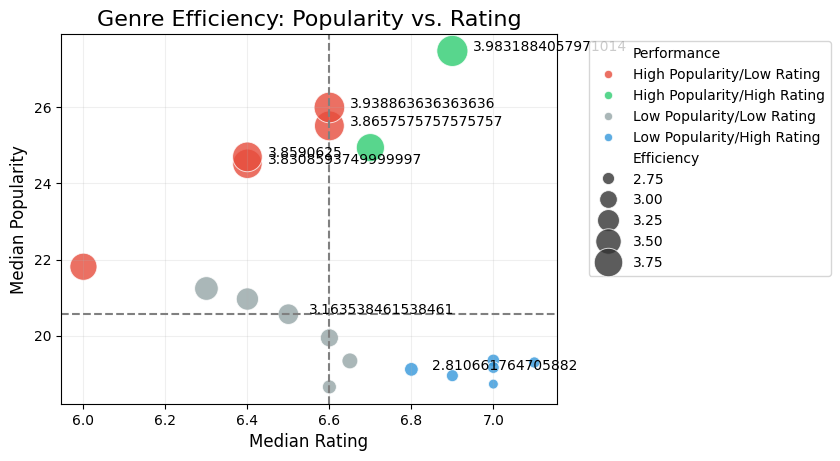

In [73]:
# Bubble plot showing efficiency
scatter = sns.scatterplot(
    data=genre_stats,
    x='Vote_Average',
    y='Popularity',
    size='Efficiency',
    hue='Performance',
    sizes=(50, 500),
    palette={'High Popularity/High Rating': '#2ecc71',
             'High Popularity/Low Rating': '#e74c3c',
             'Low Popularity/High Rating': '#3498db',
             'Low Popularity/Low Rating': '#95a5a6'},
    alpha=0.8
)

# Add labels for top genres
for line in range(genre_stats.shape[0]):
    if genre_stats['Efficiency'][line] > genre_stats['Efficiency'].quantile(0.75) or \
       genre_stats['Movie_Count'][line] > genre_stats['Movie_Count'].quantile(0.9):
        scatter.text(genre_stats['Vote_Average'][line]+0.05,
                    genre_stats['Popularity'][line],
                    genre_stats['Efficiency'][line],
                    horizontalalignment='left',
                    size=10,
                    color='black')

plt.title('Genre Efficiency: Popularity vs. Rating', fontsize=16)
plt.xlabel('Median Rating', fontsize=12)
plt.ylabel('Median Popularity', fontsize=12)
plt.axvline(genre_stats['Vote_Average'].median(), linestyle='--', color='grey')
plt.axhline(genre_stats['Popularity'].median(), linestyle='--', color='grey')
plt.grid(alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [71]:
# Add efficiency table
top_genres = genre_stats.sort_values('Efficiency', ascending=False).head(10)
print("\nTop 10 Genres by Efficiency (Popularity/Rating):")
print(top_genres.to_string(index=False))


Top 10 Genres by Efficiency (Popularity/Rating):
 Popularity  Vote_Average  Movie_Count  Efficiency                 Performance
    27.4840           6.9         1439    3.983188 High Popularity/High Rating
    25.9965           6.6         1308    3.938864  High Popularity/Low Rating
    25.5140           6.6         1853    3.865758  High Popularity/Low Rating
    24.6980           6.4         1273    3.859062  High Popularity/Low Rating
    24.5175           6.4         2686    3.830859  High Popularity/Low Rating
    24.9400           6.7         1414    3.722388 High Popularity/High Rating
    21.8100           6.0         1470    3.635000  High Popularity/Low Rating
    21.2380           6.3         2488    3.371111   Low Popularity/Low Rating
    20.9610           6.4          773    3.275156   Low Popularity/Low Rating
    20.5630           6.5         3031    3.163538   Low Popularity/Low Rating
